In [18]:
import pandas as pd
import numpy as np
import pickle

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

## Data Preparation

In [3]:
#Data Preparation
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    def converttemp(x):
        x = (x * 1.8) + 32
        return float(x)
    df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
    df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
    df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
    df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
    df["dt"] = pd.to_datetime(df["dt"])
    df["Month"] = df["dt"].dt.month
    df["Year"] = df["dt"].dt.year
    df = df.drop("dt", axis=1)
    df = df.drop("Month", axis=1)
    df = df.set_index(["Year"])
    df = df.dropna()
    return df

global_temp = wrangle(global_temp)


      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   
...                      ...                 ...                 ...   
2015                 58.5590             69.2582             48.2090   
2015                 55.3982             65.9210             44.9582   
2015                 51.4418             61.6100             41.4176   
2015                 45.3794             55.2056             35.8826   
2015                 41.9324             51.3050             32.5166   

      LandAndOceanAverageTemperature  
Year                    

In [4]:
print(global_temp)

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   
...                      ...                 ...                 ...   
2015                 58.5590             69.2582             48.2090   
2015                 55.3982             65.9210             44.9582   
2015                 51.4418             61.6100             41.4176   
2015                 45.3794             55.2056             35.8826   
2015                 41.9324             51.3050             32.5166   

      LandAndOceanAverageTemperature  
Year                    

In [5]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1850 to 2015
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          1992 non-null   float64
 1   LandMaxTemperature              1992 non-null   float64
 2   LandMinTemperature              1992 non-null   float64
 3   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4)
memory usage: 77.8 KB


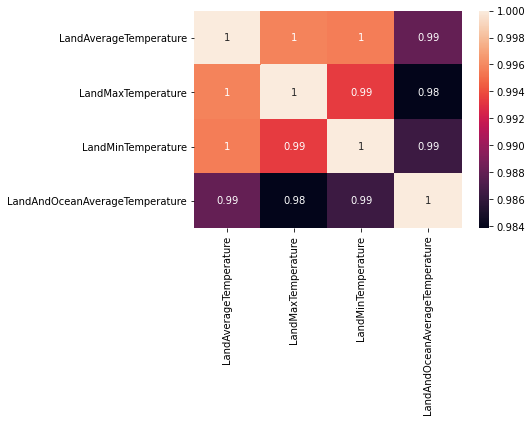

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
target = "LandAndOceanAverageTemperature"
y = global_temp[target]
x = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor


rfr_model = RandomForestRegressor(n_estimators=100,max_depth=50,random_state=77,n_jobs=-1)

In [15]:
rfr_model.fit(xtrain, ytrain)
ypred = rfr_model.predict(xval)


In [16]:
errors = abs(ypred - yval)

In [17]:
mape = 100 * (errors/ytrain)
accuracy = 100 - np.mean(mape)
print("Random Forest Model: ", round(accuracy, 2), "%")

Random Forest Model:  99.58 %


In [19]:
# Creating a pickle file for the model
filename = 'weather_prediction.pkl'
pickle.dump(rfr_model, open(filename, 'wb'))

In [25]:
print(xtrain.columns)
print(ytrain)


Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature'], dtype='object')
Year
1931    56.5178
1980    60.0404
1956    62.2940
1865    57.0452
1939    56.3684
         ...   
1944    58.3376
1957    58.1288
1921    61.0988
1971    62.1536
1943    58.1540
Name: LandAndOceanAverageTemperature, Length: 1494, dtype: float64


In [26]:
import json

columns = {'data_columns' : [col.lower() for col in xtrain.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))    

In [29]:
xval[0:1]

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
Year,,,
1923,38.984,48.6842,28.5746


In [32]:
yval[0:1]

Year
1923    56.7302
Name: LandAndOceanAverageTemperature, dtype: float64

In [33]:
yy = rfr_model.predict(xval[0:1])

In [34]:
yy

array([57.01289])